In [2]:
from IPython.display import Image
#we were having issues embedding images in the blog post when converting to html, 
#unfortunately throughout the post there will be little code snippets to insert the images

### Blog Post - Written by Devyani McLaren & Christine Song
## Do your local restaurants meet the Michelin Star standard? A machine learning model may be able to help.

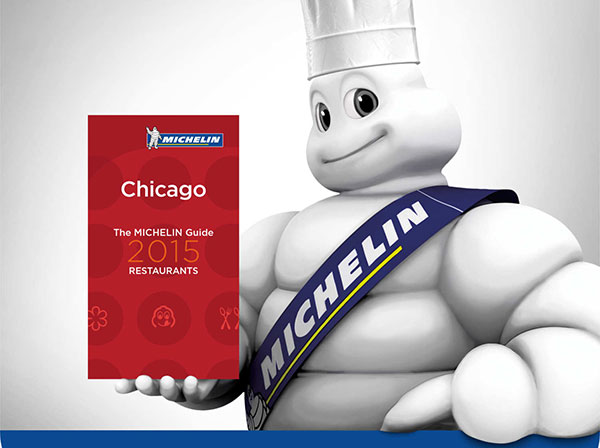

In [14]:
Image('michelinman.png')

Although we are unable to go out to eat and travel during the pesky coronavirus pandemic, one can still dream. And we can accomplish this through some data analysis on Michelin star restaurants around the world!

**Caution:** _You may get hungry._ 

### Problem
Given the current lockdown situation in Canada, more people have turned to using services such as UberEats or DoorDash to get delivery food. But wouldn't it be interesting to see how your favourite delivery restaurant compares to the Michelin-star rated restaurants around the world? Maybe you could find a hidden gem in your neigborhood worthy of a coveted Michelin star. 

### Our model
Through data science, we created a classification model (using `sklearn`'s `LGBMClassifier`) that would output the number of stars (1, 2, or 3) a restaurant would receive given the restaurant's: 
1. location data (latitude, longitude, city, Michelin-defined region)
2. cuisine
3. price 

Our model was trained on the kaggle dataset [here](https://www.kaggle.com/jackywang529/michelin-restaurants?select=one-star-michelin-restaurants.csv).

We drop the columns `year`, `zipcode`, `url`, `name`. 

`year` is dropped because this column corresponds to the year the Michelin star was awarded which does not exist (yet) for a new restaurant that it may make a prediction on. Additionally, existing restaurants should not influence the prediction of stars for a new restaurant with features like `url` and `name`. Finally, `zipcode` is redundant when we already have 4 other location features (see above).

### The dataset
The dataset originally came as three separate .csv files based on the number of stars (1, 2, or 3) awarded in 2018-2019 which was manually combined to create one large .csv file. We 75% of the restaurants to train our model on so it could learn how best to classify, and used the remaining 25% to test how well it performed. 

Through some exploratory data analysis (EDA) on our training data, we could see that the city with the most Michelin-star restaurants was New York, and the region with the most Michelin starred restaurants  was the United Kingdom by a very large margin. Take a look at figure 1 to get an idea of where all the Michelin Starred restaurants are!

The most popular cuisine was (surprise) Modern cuisine. Another interesting point we saw was that L'Atelier de Joël Robuchon, Blackbird, and Sushi Ginza Onodera appeared multiple times in the dataset, leading us to believe that they had been awarded different Michelin stars in the span of 2 years; however, more detailed inspection revealed that they were franchises with the same name!

We can largely group our dataset into three parts for the entire process - the training set, validation set, and testing set. We use the training set in conjunction with the validation set to try and tune our model to get the best possible *score* before we can test our model on the testing set.

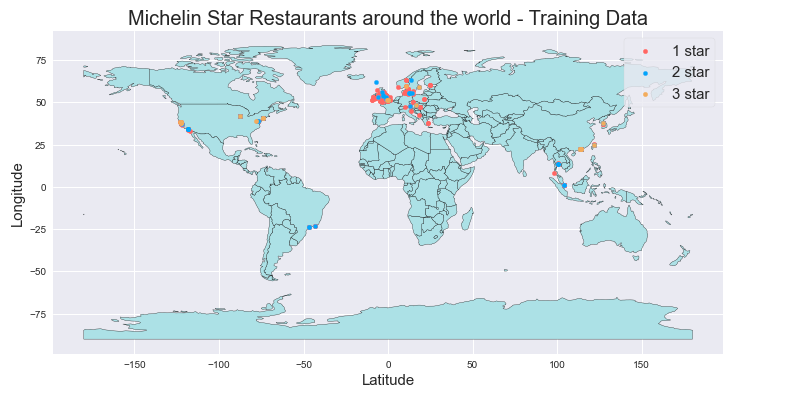

In [17]:
Image('worldmap.png')

#### **Fig 1:** A map of all the Michelin Starred restaurants from 2018-2019 in our training data

### Our results
After testing multiple different models, our final model gave a 67% precision score on the validation set and a 92% precision score on the training set. See figures 2 and 3.

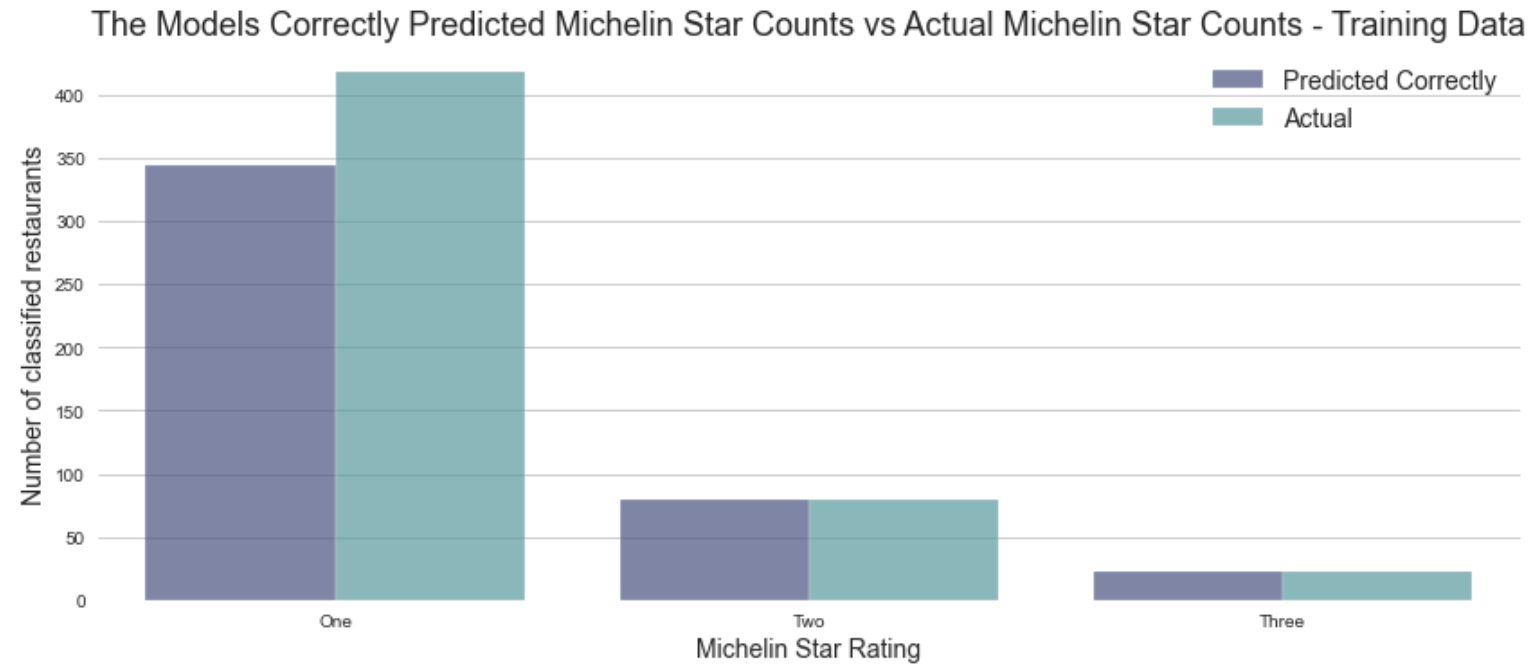

In [19]:
Image('actual_results_train.png', width = 700)

#### Fig 2: Bar plot of actual # of michelin starred restaurants in the training dataset vs the number of starred restaurants the model said were in the training set.

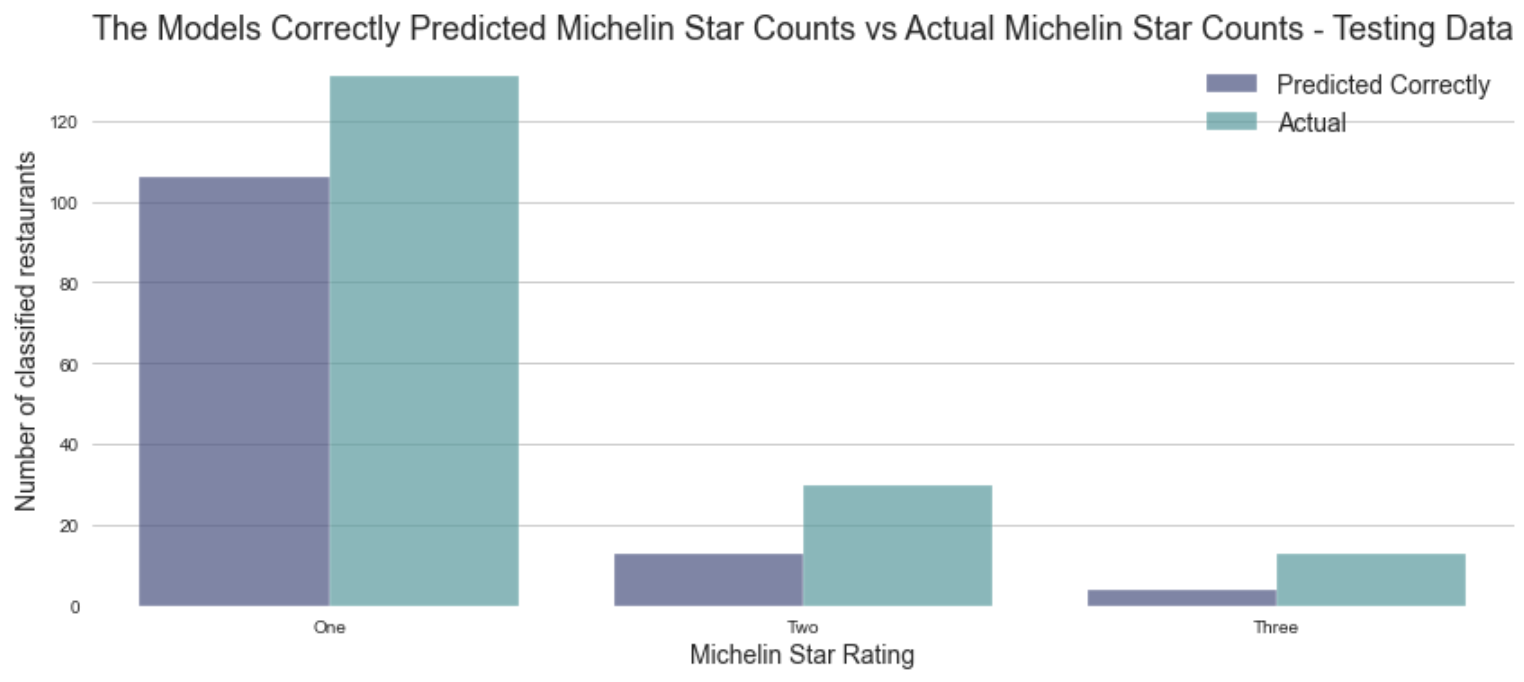

In [20]:
Image('actual_results_test.png', width = 700)

#### Fig 3: Bar plot of actual # of michelin starred restaurants in the training dataset vs the number of starred restaurants the model said were in the training set.

As we can see from figure 3, our model would always underpredict the # of one, two, and three starred restaurants there were. Explaining the poor precision score it received.

If you'd like to see how we calculated the counts for figures 2 and 3 see below (CM 1 and CM 2). These are confusion matrices depicting the counts of restaurants our model predicted to have 1,2 or 3 stars vs how many actual 1, 2, or 3 starred restaurants existed in the data set. 

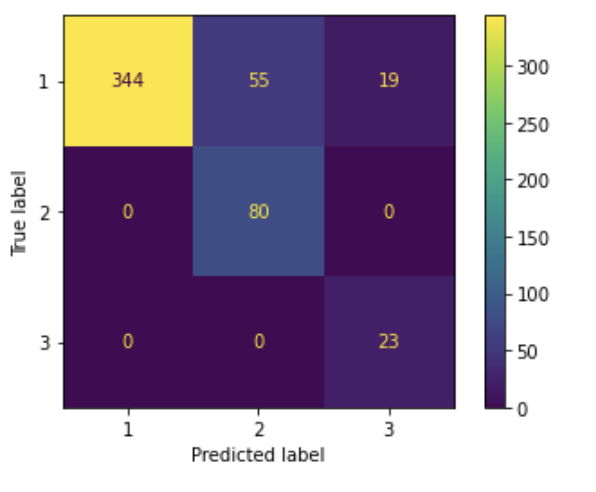

In [21]:
Image('training_cm_hw8.png', width=300)

**CM 1:** The above confusion matrix is from our chosen `LGBMClassifier` model used on our training data

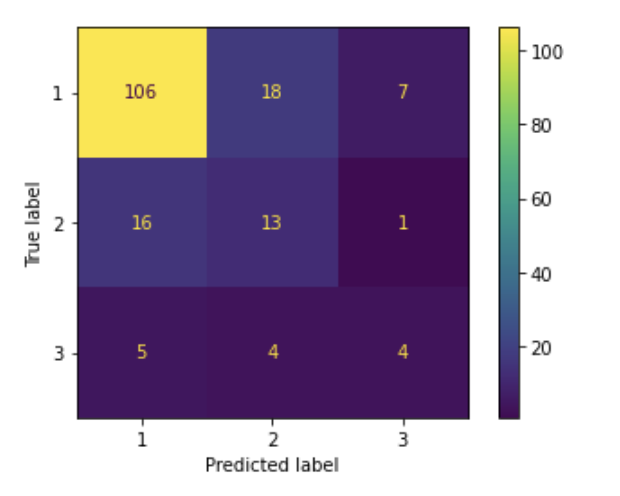

In [23]:
Image('testing_cm_hw8.png', width=300)

**CM 2:** The above confusion matrix is from our chosen `LGBMClassifier` model used on our testing data

### Caveats
There are a couple of caveats about our model that we would like to address. While it was an informative experience to try and classify multinomial data, we never formally learned about this during our Applied Machine Learning course (CPSC330 at UBC) for which we are writing this blog. Therefore, we worry that we may have violated the Golden Rule of ML - seeing the test set - or maybe combined them incorrectly when we could have staggered the datasets. If this was the case, then our model will unfortunately not be effective in deployment. 

Additionally, we found a large disparity between training and validation scores which makes us suspect that we were heavily overfitting onto the training set because of the small size of our dataset. Given a total of 521 restaurants, 419 of them were 1 Michelin star restaurants which also reflects the severe imbalance. While we did try to account for this, it is possible that our model was unable to learn any general trends for 2 or 3 star restaurants that may accurately reflect deployment data.

Finally, we would like to disclose a limitation of our model. Since our dataset never contained any restaurants that did not receive Michelin stars, the minimum our model can predict is 1 star which may not be the case in the real world. There are infinitely more restaurants that do not have Michelin stars, but we were unfortunately unable to learn trends to predict 0 stars. While it could be an ego boost, we recognize that this is not reflective of the real world.

All in all, this was a fun experience to test our machine learning skills covered from CPSC330 at UBC. We hope you enjoyed reading this along with us!

Thank you!

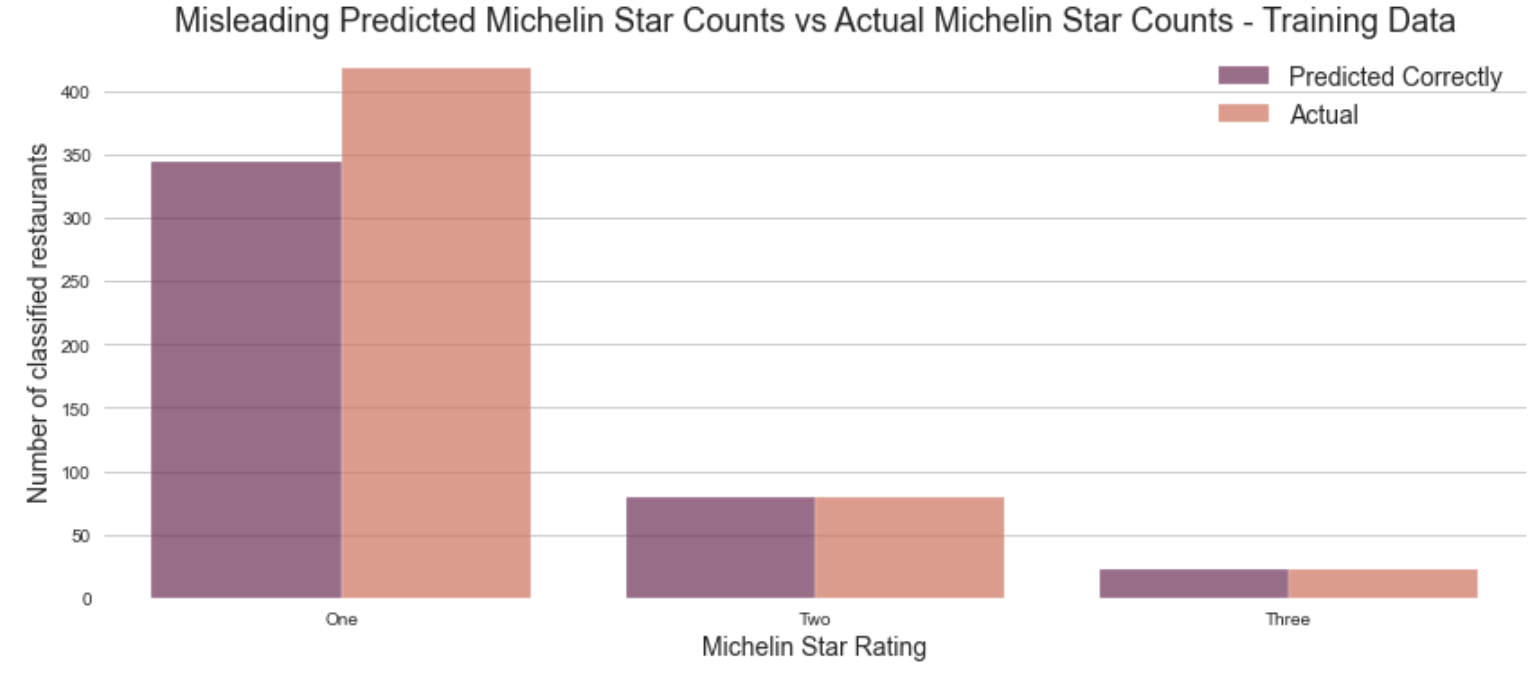

In [6]:
Image('misleading_train copy.png', width=1000)

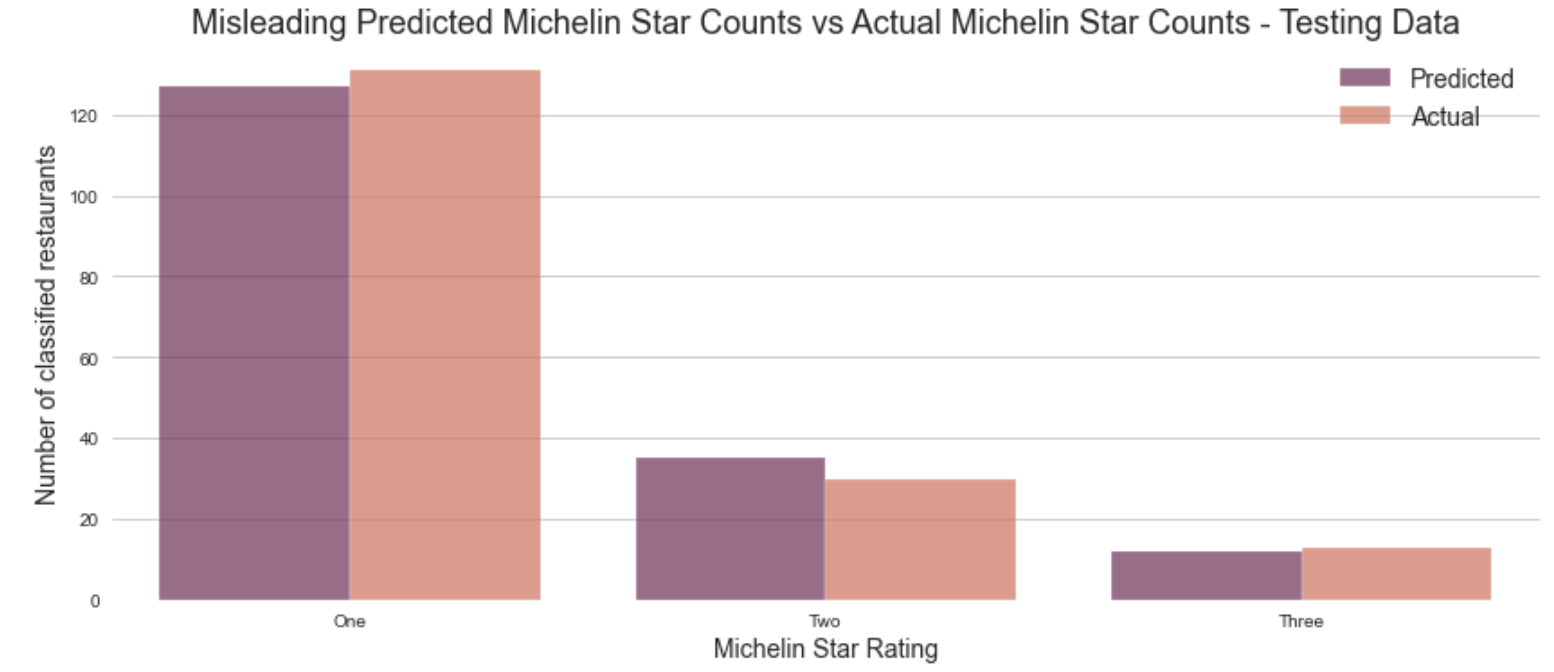

In [5]:
Image('misleading_test copy.png', width=1000)

The reason why this is misleading is because in our "predicted" counts we are  showing the _total_ number of restaurants that the model predicted to have a one, two or three star rating, as oppossed to the number that the model got correct. For our testing data, this makes it look as though the model had extremely high precision. When in reality under the "predicted" counts there are restaurants that the model predicted correctly and incorrectly. To make this visualization accurate, we would have to change it to the visualization we used in our blog post, which shows how many predictions the model actually got right. 